### Sugar vs. Normal selection strategy

30/05/2022

Test sets: 
 - system solving
 - 3-15 species biomodels

In [1]:
import matplotlib.pyplot as plt

In [124]:
import numpy as np

In [2]:
import pandas as pd

some magic with sys.path in order to load rbench

In [3]:
import os
import sys
# sys.path

In [15]:
sys.path.append('/home/ademin/reduce3/reduce-algebra-code/generic/rbench')

In [16]:
import rbench as rb

In [17]:
f5 = rb.read_filetree('./f5_baseline_all', 'f5').select('boot').deselect(['heapsize', 'valid'])

In [18]:
sugarf5 = rb.read_filetree('./f5_sugar_all', 'sugarf5').select('boot').deselect(['heapsize', 'valid'])

In [19]:
f5

f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:24:45+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:24:58+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:24:48+02:00     0.00    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:24:45+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-26 08:25:26+02:00     0.03    0.00   
...                                             ...      ...     ...   
standard/root7            2022-05-26 08:34:53+02:00     0.01    0.02   
standard/root8            2022-05-26 08:34:52+02:00     0.04    0.01   
standard/root9            2022-05-26 08:35:02+02:00     0.13    0.01   
standard/sparse5          2022-05-26 08:34:46+02:00     0.00    0.01   
standard/trinks           2022-05-26 08:34:54+02:00     0.04    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-26 08:24:58+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-26 08:24:48+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-26 08:25:26+02:00  
...                                ...                       ...  
standard/root7                     NaN 2022-05-26 08:34:54+02:00  
standard/root8                     NaN 2022-05-26 08:34:53+02:00  
standard/root9                     NaN 2022-05-26 08:35:03+02:00  
standard/sparse5                   NaN 2022-05-26 08:34:46+02:00  
standard/trinks                    NaN 2022-05-26 08:34:54+02:00  

[197 rows x 5 columns]

In [9]:
sugarf5

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000003 2022-05-30 00:55:25+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-30 00:55:15+02:00     0.00    0.01   
biomodels/BIOMD0000000024 2022-05-30 00:55:13+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-30 00:56:02+02:00     0.03    0.00   
...                                             ...      ...     ...   
standard/root7            2022-05-30 01:05:22+02:00     0.01    0.02   
standard/root8            2022-05-30 01:05:21+02:00     0.03    0.02   
standard/root9            2022-05-30 01:05:29+02:00     0.12    0.01   
standard/sparse5          2022-05-30 01:05:14+02:00     0.00    0.02   
standard/trinks           2022-05-30 01:05:23+02:00     0.04    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-30 00:55:26+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-30 00:55:16+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-30 00:55:13+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-30 00:56:02+02:00  
...                                ...                       ...  
standard/root7                     NaN 2022-05-30 01:05:22+02:00  
standard/root8                     NaN 2022-05-30 01:05:21+02:00  
standard/root9                     NaN 2022-05-30 01:05:30+02:00  
standard/sparse5                   NaN 2022-05-30 01:05:14+02:00  
standard/trinks                    NaN 2022-05-30 01:05:23+02:00  

[197 rows x 5 columns]

<AxesSubplot:xlabel='wall clock time', ylabel='jobs'>

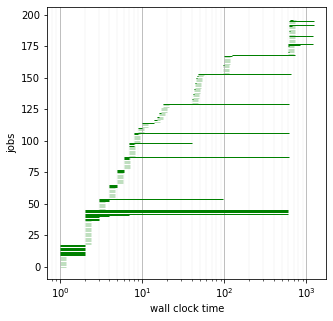

In [20]:
f5.plot.schedule()

<AxesSubplot:xlabel='wall clock time', ylabel='jobs'>

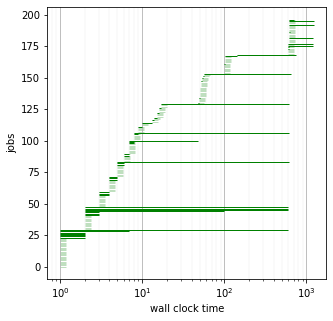

In [11]:
sugarf5.plot.schedule()

In [21]:
combo = sugarf5.join(f5, how='inner')

In [66]:
combo

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000003 2022-05-30 00:55:25+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-30 00:55:15+02:00     0.00    0.01   
biomodels/BIOMD0000000024 2022-05-30 00:55:13+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-30 00:56:02+02:00     0.03    0.00   
...                                             ...      ...     ...   
standard/root7            2022-05-30 01:05:22+02:00     0.01    0.02   
standard/root8            2022-05-30 01:05:21+02:00     0.03    0.02   
standard/root9            2022-05-30 01:05:29+02:00     0.12    0.01   
standard/sparse5          2022-05-30 01:05:14+02:00     0.00    0.02   
standard/trinks           2022-05-30 01:05:23+02:00     0.04    0.01   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000003          NaN 2022-05-30 00:55:26+02:00   
biomodels/BIOMD0000000006          NaN 2022-05-30 00:55:16+02:00   
biomodels/BIOMD0000000024          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000026          NaN 2022-05-30 00:56:02+02:00   
...                                ...                       ...   
standard/root7                     NaN 2022-05-30 01:05:22+02:00   
standard/root8                     NaN 2022-05-30 01:05:21+02:00   
standard/root9                     NaN 2022-05-30 01:05:30+02:00   
standard/sparse5                   NaN 2022-05-30 01:05:14+02:00   
standard/trinks                    NaN 2022-05-30 01:05:23+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:24:45+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:24:58+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:24:48+02:00     0.00    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:24:45+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-26 08:25:26+02:00     0.03    0.00   
...                                             ...      ...     ...   
standard/root7            2022-05-26 08:34:53+02:00     0.01    0.02   
standard/root8            2022-05-26 08:34:52+02:00     0.04    0.01   
standard/root9            2022-05-26 08:35:02+02:00     0.13    0.01   
standard/sparse5          2022-05-26 08:34:46+02:00     0.00    0.01   
standard/trinks           2022-05-26 08:34:54+02:00     0.04    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-26 08:24:58+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-26 08:24:48+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-26 08:25:26+02:00  
...                                ...                       ...  
standard/root7                     NaN 2022-05-26 08:34:54+02:00  
standard/root8                     NaN 2022-05-26 08:34:53+02:00  
standard/root9                     NaN 2022-05-26 08:35:03+02:00  
standard/sparse5                   NaN 2022-05-26 08:34:46+02:00  
standard/trinks                    NaN 2022-05-26 08:34:54+02:00  

[197 rows x 10 columns]

In [22]:
combo.head()

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000003 2022-05-30 00:55:25+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-30 00:55:15+02:00     0.00    0.01   
biomodels/BIOMD0000000024 2022-05-30 00:55:13+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-30 00:56:02+02:00     0.03    0.00   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000003          NaN 2022-05-30 00:55:26+02:00   
biomodels/BIOMD0000000006          NaN 2022-05-30 00:55:16+02:00   
biomodels/BIOMD0000000024          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000026          NaN 2022-05-30 00:56:02+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:24:45+02:00     0.15    0.01   
biomodels/BIOMD0000000003 2022-05-26 08:24:58+02:00     0.01    0.01   
biomodels/BIOMD0000000006 2022-05-26 08:24:48+02:00     0.00    0.00   
biomodels/BIOMD0000000024 2022-05-26 08:24:45+02:00     0.00    0.01   
biomodels/BIOMD0000000026 2022-05-26 08:25:26+02:00     0.03    0.00   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000003          NaN 2022-05-26 08:24:58+02:00  
biomodels/BIOMD0000000006          NaN 2022-05-26 08:24:48+02:00  
biomodels/BIOMD0000000024          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000026          NaN 2022-05-26 08:25:26+02:00

#### models slower than 0.05

In [110]:
df = pd.DataFrame(columns=["first", "second", "f5_faster"], 
            data=[[11.0, 12.0, 0],
                [99.0, 1.0, 0],
                [11.0, 20.0, 1]])

In [111]:
df

,first,second,f5_faster
0,11.0,12.0,0
1,99.0,1.0,0
2,11.0,20.0,1


In [112]:
midx1 = pd.MultiIndex(levels=[["f5_faster"], ["first", "second", "f5_faster"]],
                    codes=[[0, 0, 0,], [0, 1, 2,]])
midx1

MultiIndex([('f5_faster',     'first'),
            ('f5_faster',    'second'),
            ('f5_faster', 'f5_faster')],
           )

In [113]:
midx2 = pd.MultiIndex(levels=[["groebner_faster"], ["first", "second", "f5_faster"]],
                    codes=[[0, 0, 0,], [0, 1, 2,]])
midx2

MultiIndex([('groebner_faster',     'first'),
            ('groebner_faster',    'second'),
            ('groebner_faster', 'f5_faster')],
           )

In [114]:
df

,first,second,f5_faster
0,11.0,12.0,0
1,99.0,1.0,0
2,11.0,20.0,1


In [115]:
df1 = df.copy()
df1.columns = midx1

In [116]:
df1

f5_faster                 
      first second f5_faster
0      11.0   12.0         0
1      99.0    1.0         0
2      11.0   20.0         1

In [117]:
df2 = df.copy()
df2.columns = midx2

In [118]:
df2

groebner_faster                 
            first second f5_faster
0            11.0   12.0         0
1            99.0    1.0         0
2            11.0   20.0         1

In [178]:
merged = pd.concat([df1, df2], axis=1)
merged

f5_faster                  groebner_faster                 
      first second f5_faster           first second f5_faster
0      11.0   12.0         0            11.0   12.0         0
1      99.0    1.0         0            99.0    1.0         0
2      11.0   20.0         1            11.0   20.0         1

In [179]:
mergedcopy = merged.copy()

In [180]:
idx = merged[merged[('f5_faster', 'f5_faster')] == 0].index
rows = merged.loc[idx]
rows[[('f5_faster', 'first'), ('f5_faster', 'second')]] = np.nan
merged.loc[idx] = rows

In [181]:
merged

f5_faster                  groebner_faster                 
      first second f5_faster           first second f5_faster
0       NaN    NaN         0            11.0   12.0         0
1       NaN    NaN         0            99.0    1.0         0
2      11.0   20.0         1            11.0   20.0         1

In [182]:
idx = merged[merged[('groebner_faster', 'f5_faster')] == 1].index
rows = merged.loc[idx]
rows[[('groebner_faster', 'first'), ('groebner_faster', 'second')]] = np.nan
merged.loc[idx] = rows

In [183]:
merged

f5_faster                  groebner_faster                 
      first second f5_faster           first second f5_faster
0       NaN    NaN         0            11.0   12.0         0
1       NaN    NaN         0            99.0    1.0         0
2      11.0   20.0         1             NaN    NaN         1

In [184]:
rbmerged = rb.analytics.RbDataFrame(merged)

<AxesSubplot:xlabel='first', ylabel='second'>

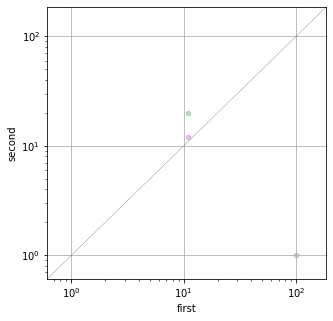

In [186]:
# scatter (x, c1) and (y, c1)
# scatter (x, c2) and (y, c2)
rb.analytics.RbDataFrame(rbmerged).plot.scatter2(x="first", y ="second", c1="f5_faster", c2="groebner_faster")

In [168]:
combo005.head(2)

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000028 2022-05-30 00:55:26+02:00     0.12    0.01   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000028          NaN 2022-05-30 00:55:27+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:24:45+02:00     0.15    0.01   
biomodels/BIOMD0000000028 2022-05-26 08:24:59+02:00     0.12    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000028          NaN 2022-05-26 08:25:00+02:00

<AxesSubplot:xlabel='sugarf5', ylabel='f5'>

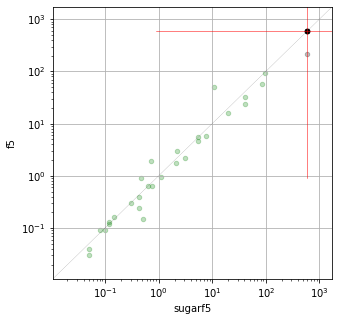

In [169]:
combo005.plot.scatter1(x='sugarf5', y='f5', c='cpu_boot')

In [79]:
df.rename(columns={
    "first_reduction" : ("f5", "first_reduction"),
    "second_reduction" : ("f5", "second_reduction")
    })

,"(f5, first_reduction)","(f5, second_reduction)",f5_or_groebner
0,11.0,12.0,0
1,99.0,1.0,0
2,11.0,20.0,1


In [72]:
pd.DataFrame(data=pd.DataFrame({"a":[1, 2], "b":[1, 3]}), columns=["wuwu"])

,wuwu
0,NaN
1,NaN


In [65]:
df.reindex(['a', 'b', 'c', 'd'], axis=1)

,a,b,c,d
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


In [60]:
pd.concat([df[df["f5_or_groebner"] == 1], df[df["f5_or_groebner"] == 0]], axis=1)

,first reduction,second reduction,f5_or_groebner,first reduction,second reduction,f5_or_groebner
2,11.0,20.0,1.0,NaN,NaN,NaN
0,NaN,NaN,NaN,11.0,12.0,0.0
1,NaN,NaN,NaN,99.0,1.0,0.0


In [51]:
newdf = pd.DataFrame(columns=[("groebner", "easy"), ("groebner", "hard"), ("f5", "easy"), ("f5", "hard")],
                 data=[df[df["f5_or_groebner"] == 0]]
                    )

ValueError: Must pass 2-d input. shape=(1, 2, 3)

<AxesSubplot:xlabel='first reduction', ylabel='second reduction'>

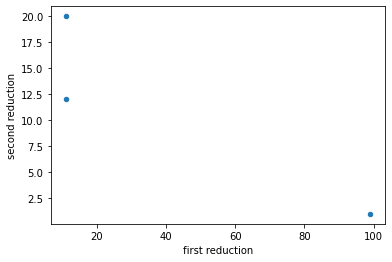

In [37]:
df.plot.scatter(x="first reduction", y="second reduction")

In [155]:
combo005 = combo.slow(0.05)
type(combo005)

rbench.analytics.RbDataFrame

In [161]:
combo005.head(2)

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000028 2022-05-30 00:55:26+02:00     0.12    0.01   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000028          NaN 2022-05-30 00:55:27+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-26 08:24:45+02:00     0.15    0.01   
biomodels/BIOMD0000000028 2022-05-26 08:24:59+02:00     0.12    0.01   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000002          NaN 2022-05-26 08:24:45+02:00  
biomodels/BIOMD0000000028          NaN 2022-05-26 08:25:00+02:00

<AxesSubplot:xlabel='sugarf5', ylabel='f5'>

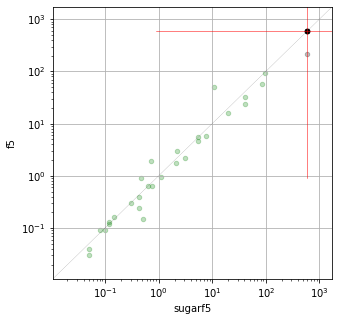

In [14]:
combo005.plot.scatter1(x='sugarf5', y='f5', c='cpu_boot')
#combo005.plot.scatter(x=('sugarf5', 'cpu_boot'), y=('f5', 'cpu_boot'))

In [16]:
combo005[combo005[('f5', 'cpu_boot')].isna()]

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000085 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-30 00:55:16+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-30 00:55:12+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-30 00:55:19+02:00      NaN     NaN   
biomodels/BIOMD0000000184 2022-05-30 00:55:28+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-30 00:56:07+02:00      NaN     NaN   
biomodels/BIOMD0000000646 2022-05-30 00:55:13+02:00      NaN     NaN   
standard/hairer2          2022-05-30 01:05:20+02:00      NaN     NaN   
standard/nbody4           2022-05-30 01:05:15+02:00      NaN     NaN   
standard/nbody4sym        2022-05-30 01:05:23+02:00      NaN     NaN   
standard/nbody5           2022-05-30 01:05:31+02:00      NaN     NaN   
standard/root12           2022-05-30 00:57:34+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000085        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000086        600.0 2022-05-30 01:05:17+02:00   
biomodels/BIOMD0000000102        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000103        600.0 2022-05-30 01:05:20+02:00   
biomodels/BIOMD0000000184        600.0 2022-05-30 01:05:29+02:00   
biomodels/BIOMD0000000315        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000447        600.0 2022-05-30 01:06:08+02:00   
biomodels/BIOMD0000000646        600.0 2022-05-30 01:05:14+02:00   
standard/hairer2                 600.0 2022-05-30 01:15:22+02:00   
standard/nbody4                  600.0 2022-05-30 01:15:15+02:00   
standard/nbody4sym               600.0 2022-05-30 01:15:35+02:00   
standard/nbody5                  600.0 2022-05-30 01:15:31+02:00   
standard/root12                  600.0 2022-05-30 01:07:36+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000085 2022-05-26 08:24:45+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-26 08:24:49+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-26 08:24:45+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-26 08:24:51+02:00      NaN     NaN   
biomodels/BIOMD0000000184 2022-05-26 08:25:01+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-26 08:24:45+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-26 08:25:31+02:00      NaN     NaN   
biomodels/BIOMD0000000646 2022-05-26 08:24:45+02:00      NaN     NaN   
standard/hairer2          2022-05-26 08:34:52+02:00      NaN     NaN   
standard/nbody4           2022-05-26 08:34:47+02:00      NaN     NaN   
standard/nbody4sym        2022-05-26 08:34:54+02:00      NaN     NaN   
standard/nbody5           2022-05-26 08:35:04+02:00      NaN     NaN   
standard/root12           2022-05-26 08:26:46+02:00      NaN     NaN   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000085        600.0 2022-05-26 08:34:47+02:00  
biomodels/BIOMD0000000086        600.0 2022-05-26 08:34:50+02:00  
biomodels/BIOMD0000000102        600.0 2022-05-26 08:34:46+02:00  
biomodels/BIOMD0000000103        600.0 2022-05-26 08:34:52+02:00  
biomodels/BIOMD0000000184        600.0 2022-05-26 08:35:02+02:00  
biomodels/BIOMD0000000315        600.0 2022-05-26 08:34:47+02:00  
biomodels/BIOMD0000000447        600.0 2022-05-26 08:35:32+02:00  
biomodels/BIOMD0000000646        600.0 2022-05-26 08:34:47+02:00  
standard/hairer2                 600.0 2022-05-26 08:44:54+02:00  
standard/nbody4                  600.0 2022-05-26 08:44:47+02:00  
standard/nbody4sym               600.0 2022-05-26 08:45:0

In [17]:
combo005[combo005[('sugarf5', 'cpu_boot')].isna()]

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000085 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-30 00:55:16+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-30 00:55:12+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-30 00:55:19+02:00      NaN     NaN   
biomodels/BIOMD0000000184 2022-05-30 00:55:28+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-30 00:56:07+02:00      NaN     NaN   
biomodels/BIOMD0000000646 2022-05-30 00:55:13+02:00      NaN     NaN   
standard/hairer2          2022-05-30 01:05:20+02:00      NaN     NaN   
standard/henrion6         2022-05-30 01:05:14+02:00      NaN     NaN   
standard/nbody4           2022-05-30 01:05:15+02:00      NaN     NaN   
standard/nbody4sym        2022-05-30 01:05:23+02:00      NaN     NaN   
standard/nbody5           2022-05-30 01:05:31+02:00      NaN     NaN   
standard/root12           2022-05-30 00:57:34+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000085        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000086        600.0 2022-05-30 01:05:17+02:00   
biomodels/BIOMD0000000102        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000103        600.0 2022-05-30 01:05:20+02:00   
biomodels/BIOMD0000000184        600.0 2022-05-30 01:05:29+02:00   
biomodels/BIOMD0000000315        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000447        600.0 2022-05-30 01:06:08+02:00   
biomodels/BIOMD0000000646        600.0 2022-05-30 01:05:14+02:00   
standard/hairer2                 600.0 2022-05-30 01:15:22+02:00   
standard/henrion6                600.0 2022-05-30 01:15:14+02:00   
standard/nbody4                  600.0 2022-05-30 01:15:15+02:00   
standard/nbody4sym               600.0 2022-05-30 01:15:35+02:00   
standard/nbody5                  600.0 2022-05-30 01:15:31+02:00   
standard/root12                  600.0 2022-05-30 01:07:36+02:00   

                                                 f5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000085 2022-05-26 08:24:45+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-26 08:24:49+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-26 08:24:45+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-26 08:24:51+02:00      NaN     NaN   
biomodels/BIOMD0000000184 2022-05-26 08:25:01+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-26 08:24:45+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-26 08:25:31+02:00      NaN     NaN   
biomodels/BIOMD0000000646 2022-05-26 08:24:45+02:00      NaN     NaN   
standard/hairer2          2022-05-26 08:34:52+02:00      NaN     NaN   
standard/henrion6         2022-05-26 08:34:47+02:00   215.11    0.02   
standard/nbody4           2022-05-26 08:34:47+02:00      NaN     NaN   
standard/nbody4sym        2022-05-26 08:34:54+02:00      NaN     NaN   
standard/nbody5           2022-05-26 08:35:04+02:00      NaN     NaN   
standard/root12           2022-05-26 08:26:46+02:00      NaN     NaN   

                                                                  
                          sigxcpu_boot                  end_boot  
biomodels/BIOMD0000000085        600.0 2022-05-26 08:34:47+02:00  
biomodels/BIOMD0000000086        600.0 2022-05-26 08:34:50+02:00  
biomodels/BIOMD0000000102        600.0 2022-05-26 08:34:46+02:00  
biomodels/BIOMD0000000103        600.0 2022-05-26 08:34:52+02:00  
biomodels/BIOMD0000000184        600.0 2022-05-26 08:35:02+02:00  
biomodels/BIOMD0000000315        600.0 2022-05-26 08:34:47+02:00  
biomodels/BIOMD0000000447        600.0 2022-05-26 08:35:32+02:00  
biomodels/BIOMD0000000646        600.0 2022-05

In [18]:
combo.slow(0.5)

sugarf5                   \
                                         start_boot cpu_boot gc_boot   
biomodels/BIOMD0000000002 2022-05-30 00:55:12+02:00     0.51    0.01   
biomodels/BIOMD0000000038 2022-05-30 00:56:04+02:00     2.12    0.00   
biomodels/BIOMD0000000046 2022-05-30 00:55:21+02:00     2.18    0.01   
biomodels/BIOMD0000000085 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000086 2022-05-30 00:55:16+02:00      NaN     NaN   
biomodels/BIOMD0000000102 2022-05-30 00:55:12+02:00      NaN     NaN   
biomodels/BIOMD0000000103 2022-05-30 00:55:19+02:00      NaN     NaN   
biomodels/BIOMD0000000108 2022-05-30 00:55:12+02:00     5.33    0.02   
biomodels/BIOMD0000000123 2022-05-30 00:55:13+02:00    95.19    0.01   
biomodels/BIOMD0000000166 2022-05-30 00:55:13+02:00     0.72    0.01   
biomodels/BIOMD0000000184 2022-05-30 00:55:28+02:00      NaN     NaN   
biomodels/BIOMD0000000315 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000447 2022-05-30 00:56:07+02:00      NaN     NaN   
biomodels/BIOMD0000000637 2022-05-30 00:55:24+02:00     1.13    0.01   
biomodels/BIOMD0000000646 2022-05-30 00:55:13+02:00      NaN     NaN   
biomodels/BIOMD0000000759 2022-05-30 00:55:18+02:00    40.53    0.01   
standard/cassou           2022-05-30 01:05:22+02:00    10.64    0.01   
standard/eco7             2022-05-30 01:05:21+02:00     0.47    0.01   
standard/hairer2          2022-05-30 01:05:20+02:00      NaN     NaN   
standard/henrion5         2022-05-30 00:56:53+02:00    40.67    0.01   
standard/henrion6         2022-05-30 01:05:14+02:00      NaN     NaN   
standard/katsura6         2022-05-30 01:05:17+02:00     3.18    0.01   
standard/kinema           2022-05-30 01:05:21+02:00    19.65    0.02   
standard/nbody4           2022-05-30 01:05:15+02:00      NaN     NaN   
standard/nbody4sym        2022-05-30 01:05:23+02:00      NaN     NaN   
standard/nbody5           2022-05-30 01:05:31+02:00      NaN     NaN   
standard/noon6            2022-05-30 01:05:21+02:00     0.74    0.01   
standard/noon7            2022-05-30 01:05:14+02:00     7.76    0.01   
standard/noon8            2022-05-30 01:05:33+02:00    84.56    0.01   
standard/root10           2022-05-30 01:05:30+02:00     0.63    0.01   
standard/root11           2022-05-30 01:05:14+02:00     5.56    0.01   
standard/root12           2022-05-30 00:57:34+02:00      NaN     NaN   

                                                                  \
                          sigxcpu_boot                  end_boot   
biomodels/BIOMD0000000002          NaN 2022-05-30 00:55:13+02:00   
biomodels/BIOMD0000000038          NaN 2022-05-30 00:56:06+02:00   
biomodels/BIOMD0000000046          NaN 2022-05-30 00:55:24+02:00   
biomodels/BIOMD0000000085        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000086        600.0 2022-05-30 01:05:17+02:00   
biomodels/BIOMD0000000102        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000103        600.0 2022-05-30 01:05:20+02:00   
biomodels/BIOMD0000000108          NaN 2022-05-30 00:55:18+02:00   
biomodels/BIOMD0000000123          NaN 2022-05-30 00:56:50+02:00   
biomodels/BIOMD0000000166          NaN 2022-05-30 00:55:14+02:00   
biomodels/BIOMD0000000184        600.0 2022-05-30 01:05:29+02:00   
biomodels/BIOMD0000000315        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000447        600.0 2022-05-30 01:06:08+02:00   
biomodels/BIOMD0000000637          NaN 2022-05-30 00:55:25+02:00   
biomodels/BIOMD0000000646        600.0 2022-05-30 01:05:14+02:00   
biomodels/BIOMD0000000759          NaN 2022-05-30 00:55:59+02:00   
standard/cassou                    NaN 2022-05-30 01:05:33+02:00   
standard/eco7                      NaN 2022-05-30 01:05:21+02:00   
standard/hairer2                 600.0 2022-05-30 01:15:22+02:00   
standard/henrion5                  NaN 2022-05-30 00:57:34+02:00   
standard/henrion6                600.0 2022-05-30 01:15:14+02:00   
standard/katsura6              

In [19]:
combo005.dropna(subset=[('sugarf5', 'cpu_boot'), ('f5', 'cpu_boot')]).describe()

sugarf5                                 f5                        
        cpu_boot    gc_boot sigxcpu_boot   cpu_boot    gc_boot sigxcpu_boot
count  28.000000  28.000000          0.0  28.000000  28.000000          0.0
mean   11.550714   0.010000          NaN  10.777857   0.010000          NaN
std    24.656550   0.004714          NaN  21.982493   0.003849          NaN
min     0.050000   0.000000          NaN   0.030000   0.000000          NaN
25%     0.270000   0.010000          NaN   0.157500   0.010000          NaN
50%     0.730000   0.010000          NaN   0.935000   0.010000          NaN
75%     6.110000   0.010000          NaN   5.520000   0.010000          NaN
max    95.190000   0.020000          NaN  91.720000   0.020000          NaN